In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('C:\\Users\\My\\Desktop\\data.csv', parse_dates=['datekey'])
df=df.sort_values('User_ID')
#df

,User_ID,datekey,Usage_MB,age,gender_v,device_type
982145,2,2021-02-17,8,37,M,Smart phone
956246,3,2021-01-31,37,46,M,Smart phone
951239,5,2021-02-07,13,32,M,Smart phone
956247,8,2021-02-28,2754,40,M,Smart phone
951240,8,2021-03-01,1767,40,M,Smart phone
...,...,...,...,...,...,...
3679530,1659072,2021-02-02,4218,20,M,Smart phone
3533718,1659072,2021-02-20,1002,20,M,Smart phone
3606084,1659072,2021-02-06,719,20,M,Smart phone
3679531,1659072,2021-02-23,4566,20,M,Smart phone


In [4]:
#statistical Description of raw data
df.describe()

,User_ID,Usage_MB,age
count,3.752013e+06,3.752013e+06,3.752013e+06
mean,8.283118e+05,7.700764e+02,3.708919e+01
std,4.786791e+05,1.186144e+03,1.201775e+01
min,2.000000e+00,1.000000e+00,4.000000e+00
25%,4.139140e+05,1.210000e+02,2.900000e+01
50%,8.271870e+05,3.730000e+02,3.600000e+01
75%,1.242856e+06,9.650000e+02,4.400000e+01
max,1.659073e+06,7.209900e+04,6.940000e+02


In [5]:
#checking the null values
df.isna().sum()

User_ID        0
datekey        0
Usage_MB       0
age            0
gender_v       0
device_type    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3752013 entries, 982145 to 3661135
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   User_ID      int64         
 1   datekey      datetime64[ns]
 2   Usage_MB     int64         
 3   age          int64         
 4   gender_v     object        
 5   device_type  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 200.4+ MB


**Recency**

In [7]:
# having the max datekey for each user_ID and create a new data frame with it
df_max_datekey = df.groupby('User_ID').datekey.max().reset_index()
df_max_datekey.columns = ['User_ID', 'Max_datekey']
#df_max_datekey

In [8]:
# calculating the days between the max date and the dates
# Recency is the number of days, each ID is inactive
df_max_datekey['Recency'] = (df_max_datekey['Max_datekey'].max() - df_max_datekey['Max_datekey']).dt.days
df_max_datekey[['User_ID','Recency']]

,User_ID,Recency
0,2,12
1,3,29
2,5,22
3,8,0
4,9,20
...,...,...
1144120,1659068,3
1144121,1659069,3
1144122,1659071,22
1144123,1659072,0


**Frequency**

In [9]:
#get frequency counts for each user and create a dataframe with it
# in one month
df_frequency = df.groupby('User_ID').datekey.count().reset_index()
df_frequency.columns = ['User_ID','Frequency']
#df_frequency

In [10]:
#add this data to our main dataframe
df_user = pd.merge(df_max_datekey, df_frequency, on='User_ID')

In [11]:
df_user.drop('Max_datekey' , axis = 1 , inplace = True)

**plotting the frequency**

In [12]:
# counting the number of ID for each date
dt = df.groupby('datekey').User_ID.count().reset_index()

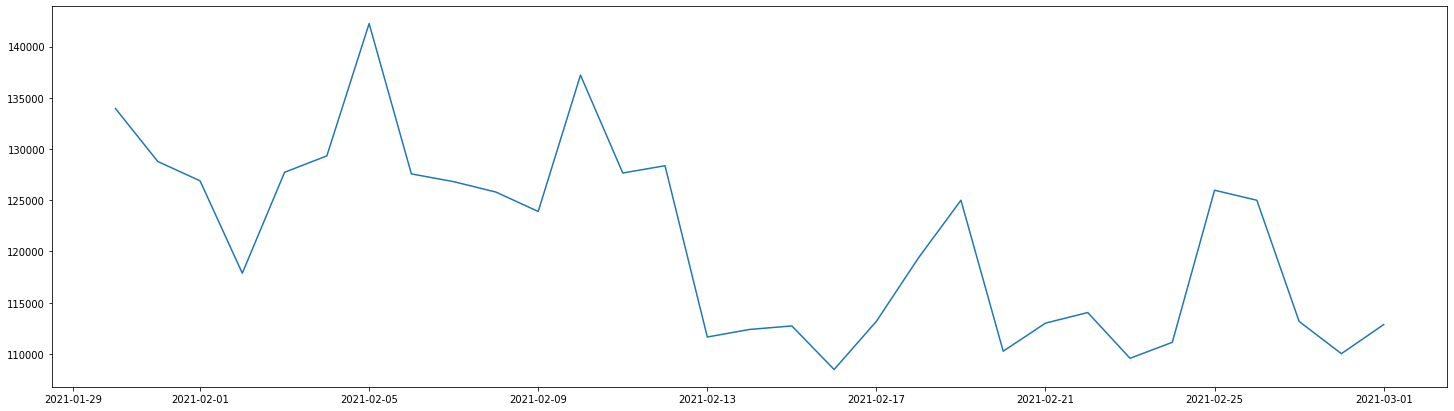

In [13]:
dh = pd.Series(dt['User_ID'], index = dt['datekey'])
dh = dh.cumsum()
plt.figure(figsize = (25,7))
plt.plot(dt['datekey'],dt['User_ID'])

**The chart is descending and in the first ten days, the frequency of ids is much higher than the rest of the weeks**

**Monetary**

In [15]:
#calculate Monetary for each user
df_Monetary = df.groupby('User_ID').Usage_MB.sum().reset_index()
df_Monetary.columns = ['User_ID','Monetary']

In [16]:
df_user = pd.merge(df_user, df_Monetary, on='User_ID',)

In [17]:
df_user.set_index(keys = 'User_ID', inplace = True, drop=True)

In [18]:
#df_user

**RFM variables ranges**

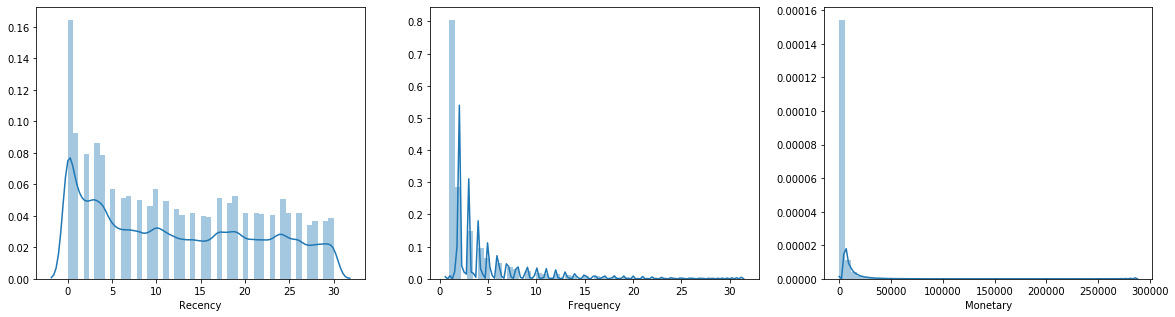

In [19]:
fig , axes = plt.subplots(1,3, figsize = (20, 5))
for i , feature in enumerate (list(df_user.columns)):
    sns.distplot(df_user[feature], ax = axes[i])

In [20]:
#statistical informations
display(df_user.describe())

,Recency,Frequency,Monetary
count,1.144125e+06,1.144125e+06,1.144125e+06
mean,1.222631e+01,3.279373e+00,2.525368e+03
std,9.383189e+00,4.109558e+00,5.998457e+03
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.050000e+02
50%,1.100000e+01,2.000000e+00,6.150000e+02
75%,2.000000e+01,4.000000e+00,2.270000e+03
max,3.000000e+01,3.100000e+01,2.880050e+05


**Data Normalizing**

In [21]:
scaler = MinMaxScaler()
df_user_normalized = pd.DataFrame(scaler.fit_transform(df_user))
df_user_normalized.columns = ['n_Recency' , 'n_Frequency', 'n_Monetary']
df_user_normalized

,n_Recency,n_Frequency,n_Monetary
0,0.400000,0.000000,0.000024
1,0.966667,0.000000,0.000125
2,0.733333,0.000000,0.000042
3,0.000000,0.033333,0.015694
4,0.666667,0.066667,0.020607
...,...,...,...
1144120,0.100000,0.133333,0.012080
1144121,0.100000,0.333333,0.038972
1144122,0.733333,0.033333,0.001177
1144123,0.000000,0.200000,0.042805


**K_means**

In [22]:
# applying Elbow_method to fine the accurate number of clusters
#start=dt.now()
SSE = []
for i in range(0 ,10):
    kmeans = KMeans(n_clusters = i+1 , random_state = 1231).fit(df_user_normalized)
    SSE.append(kmeans.inertia_)
#time_of_execute=dt.now()-start    
#print('time_of_execute:',time_of_execute)

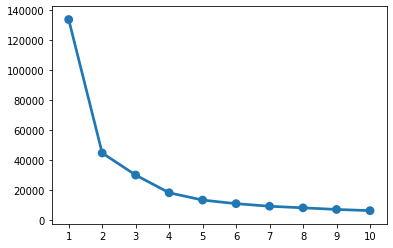

In [23]:
sns.pointplot(x = list(range(1,11)) , y = SSE)
plt.show()

# cluster = 4 or 5

In [24]:
# Applying KMeans Model
Model = KMeans(n_clusters = 4 , random_state = 1231).fit(df_user_normalized)
centers = Model.cluster_centers_

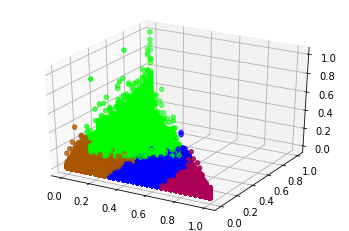

In [25]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_user_normalized['n_Recency'], df_user_normalized['n_Frequency'], df_user_normalized['n_Monetary'] , cmap = 'brg'
            , c = Model.predict(df_user_normalized) , label = ['0','1','2','3'])
ax.scatter(centers[:, 0], centers[:, 1], c = 'black')

**Identify the clusters**

In [26]:
df_user.columns = df_user.columns

In [27]:
df_user['Cluster'] = Model.labels_

In [28]:
df_user

,Recency,Frequency,Monetary,Cluster
User_ID,,,,
2,12,1,8,0
3,29,1,37,1
5,22,1,13,1
8,0,2,4521,2
9,20,3,5936,1
...,...,...,...,...
1659068,3,5,3480,2
1659069,3,11,11225,3
1659071,22,2,340,1


In [29]:
summery_of_df_user = pd.DataFrame(df_user.groupby('Cluster').agg({
                                                                    'Recency':['mean','min', 'max'],
                                                                    'Frequency':['mean','min', 'max'],
                                                                    'Monetary':['mean','min', 'max','count']}))

summery_of_df_user["Customer_Label"] = ['Normal','Bad','Good','Excellent']
summery_of_df_user

Recency          Frequency              Monetary              \
              mean min max       mean min max          mean min     max   
Cluster                                                                   
0        14.029227   9  20   2.296767   1  15   1528.191060   1  130853   
1        24.851173  20  30   1.528187   1  10    895.270863   1   93128   
2         3.406814   0   9   2.825822   1   9   1952.766903   1  113628   
3         1.938966   0  15  14.664008   8  31  14078.648736  13  288005   

                Customer_Label  
          count                 
Cluster                         
0        346053         Normal  
1        305483            Bad  
2        399804           Good  
3         92785      Excellent

In [30]:
 #creating a null column
df_user['Customer_Label'] = np.nan 

#Description of each cluster 
df_user['Customer_Label'].loc[df_user['Cluster'] == 0] = "Normal"
df_user['Customer_Label'].loc[df_user['Cluster'] == 1] = "Bad"
df_user['Customer_Label'].loc[df_user['Cluster'] == 2] = "Good"
df_user['Customer_Label'].loc[df_user['Cluster'] == 3] = "Excellent"
df_user

C:\Users\My\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Recency,Frequency,Monetary,Cluster,Customer_Label
User_ID,,,,,
2,12,1,8,0,Normal
3,29,1,37,1,Bad
5,22,1,13,1,Bad
8,0,2,4521,2,Good
9,20,3,5936,1,Bad
...,...,...,...,...,...
1659068,3,5,3480,2,Good
1659069,3,11,11225,3,Excellent
1659071,22,2,340,1,Bad


**changing the type of Gender and Device_Type columns**

In [31]:
df['categorized_gender'] = df.gender_v.astype('category').cat.codes

In [32]:
Gender = df.gender_v.astype('category')
G_Definition = dict(enumerate(Gender.cat.categories))
G_Definition

{0: 'F', 1: 'M'}

In [33]:
df['ctg_Device_type'] = df.device_type.astype('category').cat.codes
Device = df.device_type.astype('category')
D_Definition = dict(enumerate(Device.cat.categories))
D_Definition

{0: 'Basic phone',
 1: 'Feature phone',
 2: 'Other devices',
 3: 'Smart phone',
 4: 'Tablet'}

In [34]:
df_user_2 = df.groupby('User_ID').agg({'ctg_Device_type': 'max',
                                       'age' : 'max',
                                      'categorized_gender' : 'max'})

In [35]:
df_user = pd.merge(df_user, df_user_2, on='User_ID')

In [36]:
df_user

,Recency,Frequency,Monetary,Cluster,Customer_Label,ctg_Device_type,age,categorized_gender
User_ID,,,,,,,,
2,12,1,8,0,Normal,3,37,1
3,29,1,37,1,Bad,3,46,1
5,22,1,13,1,Bad,3,32,1
8,0,2,4521,2,Good,3,40,1
9,20,3,5936,1,Bad,3,31,0
...,...,...,...,...,...,...,...,...
1659068,3,5,3480,2,Good,3,43,0
1659069,3,11,11225,3,Excellent,3,50,1
1659071,22,2,340,1,Bad,3,30,1


**Calculating the average age in each cluster**

In [37]:
#Customer_Label = Normal
df_normal = df_user[df_user['Customer_Label'] == 'Normal']
age_N_mean = int(df_user['age'].mean())
age_N_mean

37

In [38]:
#Customer_Label = Good
df_good = df_user[df_user['Customer_Label'] == 'Good']
age_G_mean = int(df_user['age'].mean())
age_G_mean

37

In [39]:
#Customer_Label = Bad
df_Bad = df_user[df_user['Customer_Label'] == 'Bad']
age_B_mean = int(df_Bad['age'].mean())
age_B_mean

37

In [40]:
#Customer_Label = Excellent
df_Excellent = df_user[df_user['Customer_Label'] == 'Excellent']
age_E_mean = int(df_Excellent['age'].mean())
age_E_mean

37

In [42]:
# the mean of Statistical population
mean = int(df_user['age'].mean())
mean

37

Due to the irrational data in the age column, we use the IQR method to calculate the acceptable age range and then replace the average age of each cluster with these numbers. 

In [43]:
# Computing IQR
Q1 = df_user['age'].quantile(0.25)
Q3 = df_user['age'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =',IQR ,' ' ,'Q3 =' , Q3,' ', 'Q1 = ' ,Q1)

IQR = 15.0   Q3 = 44.0   Q1 =  29.0


In [44]:
Q11 = Q1 - 1.5*IQR
Q22 = Q3 + 1.5*IQR
print('Q11 =' ,Q11 ,' ' ,'Q22 =', Q22)

Q11 = 6.5   Q22 = 66.5


Consider the number 70 for the upper age range instead of the number 66.5
(More details in word)

In [45]:
df_user['age'].loc[df_user['age']>70] = mean

C:\Users\My\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
df_user['age'].max()

70

**Further analysis**

Based on **gender** :

In [47]:
print('The ratio of women to men in the main dataframe: ')
(df.groupby('gender_v').User_ID.count())/len(df['User_ID'])*100

The ratio of women to men in the main dataframe: 


gender_v
F    36.336148
M    63.663852
Name: User_ID, dtype: float64

In [48]:
df_user_resetindex = df_user.reset_index()

In [49]:
Excellent_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Excellent']
E = (Excellent_users.groupby('categorized_gender').User_ID.count())/len(Excellent_users['User_ID'])*100

Good_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Good']
G = (Good_users.groupby('categorized_gender').User_ID.count())/len(Good_users['User_ID'])*100

Normal_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Normal']
N = (Normal_users.groupby('categorized_gender').User_ID.count())/len(Normal_users['User_ID'])*100

Bad_users = df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Bad']
B = (Bad_users.groupby('categorized_gender').User_ID.count())/len(Bad_users['User_ID'])*100

print('The ratio of women to men in the Excellent cluster:' ,E)
print('')
print('The ratio of women to men in the Good cluster:', G)
print('')
print('The ratio of women to men in the normal cluster: ' , N)
print('')
print('The ratio of women to men in the Bad cluster:' , B)

The ratio of women to men in the Excellent cluster: categorized_gender
0    34.83645
1    65.16355
Name: User_ID, dtype: float64

The ratio of women to men in the Good cluster: categorized_gender
0    37.250503
1    62.749497
Name: User_ID, dtype: float64

The ratio of women to men in the normal cluster:  categorized_gender
0    37.643656
1    62.356344
Name: User_ID, dtype: float64

The ratio of women to men in the Bad cluster: categorized_gender
0    37.965451
1    62.034549
Name: User_ID, dtype: float64


**so:** The ratio of women to men in clusters is the **same**.

....................................................................

Based on **Device Type** :

In [50]:
Excellent_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Excellent']
ED = (Excellent_users.groupby('ctg_Device_type').User_ID.count())/len(Excellent_users['User_ID'])*100

Good_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Good']
GD = (Good_users.groupby('ctg_Device_type').User_ID.count())/len(Good_users['User_ID'])*100

Normal_users =  df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Normal']
ND = (Normal_users.groupby('ctg_Device_type').User_ID.count())/len(Normal_users['User_ID'])*100

Bad_users = df_user_resetindex[df_user_resetindex['Customer_Label'] == 'Bad']
BD = (Bad_users.groupby('ctg_Device_type').User_ID.count())/len(Bad_users['User_ID'])*100

print('The ratio of Device type in the Excellent cluster:' ,ED)
print('')
print('The ratio of Device type in the Good cluster:', GD)
print('')
print('The ratio of Device type in the normal cluster: ' , ND)
print('')
print('The ratio of Device type in the Bad cluster:' , BD)

The ratio of Device type in the Excellent cluster: ctg_Device_type
0     0.226330
1     0.344883
2     0.001078
3    94.654308
4     4.773401
Name: User_ID, dtype: float64

The ratio of Device type in the Good cluster: ctg_Device_type
0     0.409951
1     0.541765
2     0.000250
3    95.311703
4     3.736331
Name: User_ID, dtype: float64

The ratio of Device type in the normal cluster:  ctg_Device_type
0     0.521596
1     0.685155
2     0.000867
3    95.051336
4     3.741045
Name: User_ID, dtype: float64

The ratio of Device type in the Bad cluster: ctg_Device_type
0     0.732283
1     0.945388
2     0.000327
3    94.567946
4     3.754055
Name: User_ID, dtype: float64


**so:** The ratio of using of the third Device type (samart phone) is the same in the clustrs

...........................................................

Based on the **age** :

In [51]:
# less_than_20
less_than_20 = df_user_resetindex[df_user_resetindex['age']<20]
less_than_20.groupby(['categorized_gender','Customer_Label', 'ctg_Device_type']).User_ID.count()

categorized_gender  Customer_Label  ctg_Device_type
0                   Bad             0                    13
                                    1                    18
                                    3                  1724
                                    4                    30
                    Excellent       1                     1
                                    3                   388
                                    4                     4
                    Good            0                    13
                                    1                    19
                                    3                  2849
                                    4                    44
                    Normal          0                    13
                                    1                    10
                                    3                  1986
                                    4                    34
1                   Bad             0           

In [52]:
# between 20 to 40
between_20_to_40 = df_user_resetindex[(df_user_resetindex['age']>20)&(df_user_resetindex['age']<40)]
between_20_to_40.groupby(['categorized_gender','Customer_Label', 'ctg_Device_type']).User_ID.count()

categorized_gender  Customer_Label  ctg_Device_type
0                   Bad             0                     384
                                    1                     518
                                    3                   64095
                                    4                    2414
                    Excellent       0                      31
                                    1                      43
                                    3                   18296
                                    4                     960
                    Good            0                     283
                                    1                     365
                                    3                   83570
                                    4                    3179
                    Normal          0                     289
                                    1                     449
                                    3                   72635
                  

In [53]:
# between 40 to 60
between_40_to_60 = df_user_resetindex[(df_user_resetindex['age']>40)&(df_user_resetindex['age']<60)]
between_40_to_60.groupby(['categorized_gender','Customer_Label', 'ctg_Device_type']).User_ID.count()

categorized_gender  Customer_Label  ctg_Device_type
0                   Bad             0                    278
                                    1                    354
                                    3                  34346
                                    4                   1381
                    Excellent       0                     14
                                    1                     31
                                    3                   9199
                                    4                    477
                    Good            0                    188
                                    1                    268
                                    3                  42753
                                    4                   1799
                    Normal          0                    210
                                    1                    302
                                    3                  38573
                                 

In [54]:
# more then 60
more_then_60 = df_user_resetindex[df_user_resetindex['age']>60]
more_then_60.groupby(['categorized_gender','Customer_Label', 'ctg_Device_type']).User_ID.count()

categorized_gender  Customer_Label  ctg_Device_type
0                   Bad             0                    50
                                    1                    63
                                    3                  3540
                                    4                   175
                    Excellent       0                     7
                                    1                     3
                                    3                  1025
                                    4                    57
                    Good            0                    32
                                    1                    42
                                    3                  4324
                                    4                   202
                    Normal          0                    43
                                    1                    31
                                    3                  3920
                                    4           